In [1]:
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.
import pandas as pd
import os
from pathlib import Path

# **Anime recommendation**

## **Carga de datos**

In [2]:
#Anime.csv
path = Path(os.getcwd())
path = str(path.parent.absolute())
path = path+"/datos/anime.csv"
dfAnime = pd.read_csv(path,na_values='?')    
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [3]:
#rating.csv
path2 = Path(os.getcwd())
path2 = str(path2.parent.absolute())
path2 = path2+"/datos/rating.csv"
dfRating = pd.read_csv(path2,na_values='?')    
dfRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## **Tipos de dato adecuados**

In [4]:
#anime.csv
dfAnime['name'] = dfAnime['name'].astype("string")
dfAnime['genre'] = dfAnime['genre'].astype("string")
dfAnime['type'] = dfAnime['type'].astype("string")
dfAnime['episodes']=pd.to_numeric(dfAnime.episodes, errors='coerce').dropna().astype(int)
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  string 
 2   genre     12232 non-null  string 
 3   type      12269 non-null  string 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), string(3)
memory usage: 672.5 KB


 **rating.csv ya tenia los tipos de datos adecuados**

## **Busqueda y eliminacion de valores nulos o duplicados**

### anime.csv

In [5]:
nullValues = []

for i in range(len(dfAnime)):
    if(dfAnime.iloc[i].isnull().sum() != 0):
        nullValues.append(i)
print("Se encontraron ",len(nullValues)," valores nulos")
#La cantidad de datos con valores nulos no es tan grande en comparacion asi que podemos borrarlos
#Unknown es contado como nulo porque no podemos asumir la cantidad de episodios de un anime en base a otros

Se encontraron  464  valores nulos


In [6]:
dfAnime=dfAnime.drop(nullValues)
dfAnime['episodes'] = dfAnime['episodes'].astype(int)
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  string 
 2   genre     11830 non-null  string 
 3   type      11830 non-null  string 
 4   episodes  11830 non-null  int32  
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int32(1), int64(2), string(3)
memory usage: 693.2 KB


In [7]:
duplicados = dfAnime[dfAnime.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  0


In [25]:
#Convirtamos type en una variable de numeros enteros para poder usar histogramas a futuro
dfAnime=dfAnime.replace({'Movie': '0', 'TV': '1','OVA':'2','ONA':'2','Special':'3','Music':'4'})
dfAnime['type'] = dfAnime['type'].astype(int)

In [26]:
dfAnime.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",1,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",1,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",1,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",1,51,9.16,151266


### rating.csv

In [9]:
print("La cantidad de datos nulos es:")
dfRating.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

La cantidad de datos nulos es:


,user_id,anime_id,rating
0,0,0,0


In [10]:
#Eliminamos los -1 porque indican cuando no se califico un anime y siendo asi entonces no nos sirve
dfRating = dfRating[dfRating.rating != -1]

In [11]:
duplicados = dfRating[dfRating.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  1


In [12]:
dfRating.drop_duplicates(keep='first',inplace=True)
duplicados = dfRating[dfRating.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  0


In [13]:
dfRating.head(5)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [33]:
dfRating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337240 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


## **Histogramas**

array([[<AxesSubplot:title={'center':'type'}>]], dtype=object)

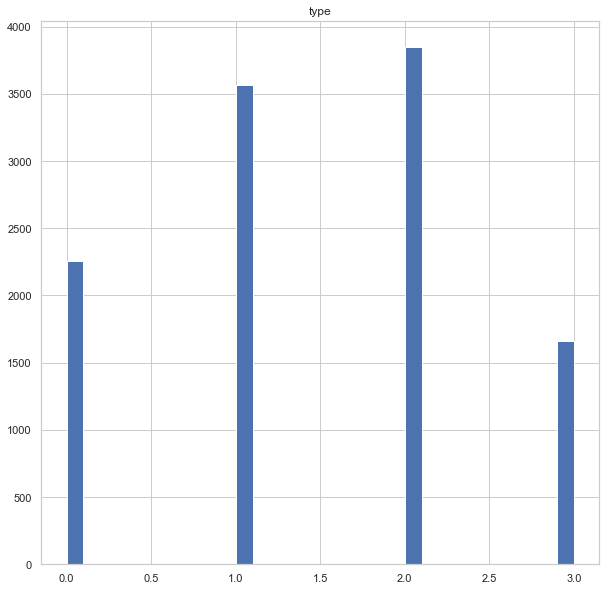

In [29]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'type'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[0, 3], bins=num_bins, figsize=(10,10))  #Histograma.

+ Observamos que aquellos tipos de anime que mas aparecen son "TV" y "OVA"

array([[<AxesSubplot:title={'center':'episodes'}>]], dtype=object)

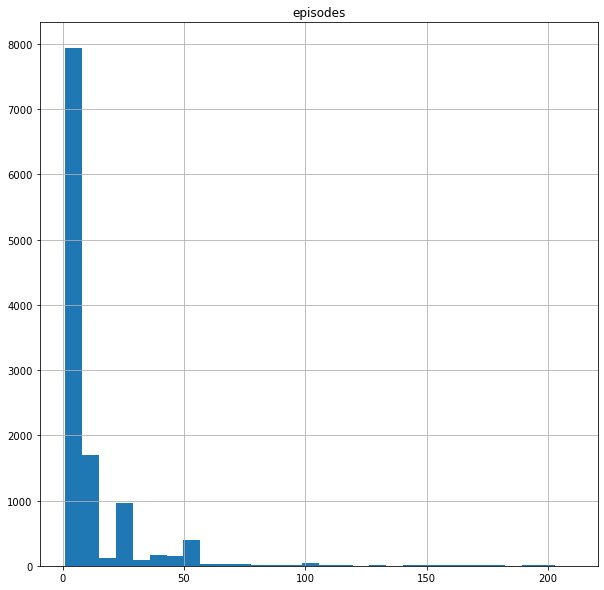

In [14]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'episodes'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[1, 210], bins=num_bins, figsize=(10,10))  #Histograma.

+ Como se puede observar hay una gran cantidad de valores en 1, esto es debido a que muchos de los animes son peliculas u ovas por lo que solo cuentan con un episodio tecnicamente

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

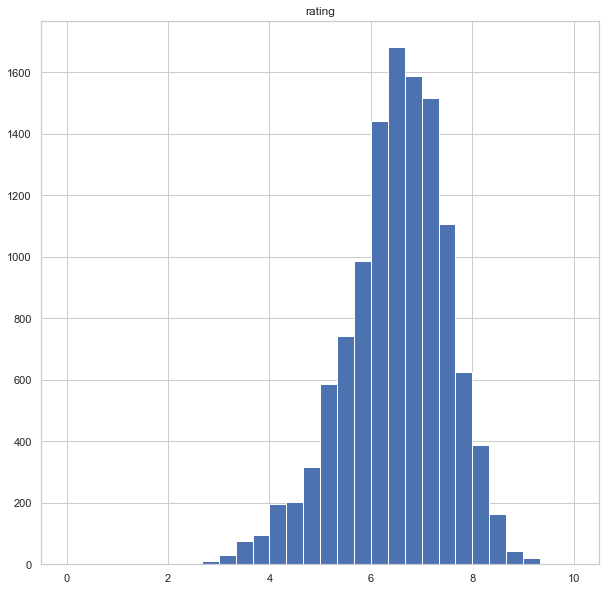

In [31]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'rating'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[0, 10], bins=num_bins, figsize=(10,10))  #Histograma.

+ Entre 6 y 7 estan la mayoria de ratings

array([[<AxesSubplot:title={'center':'members'}>]], dtype=object)

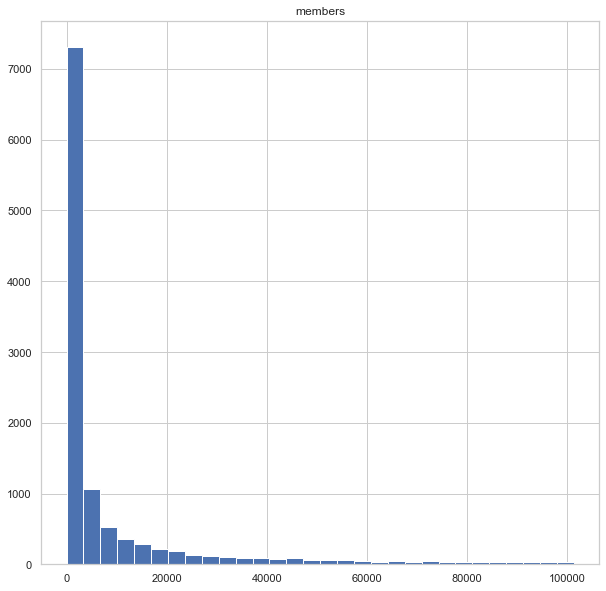

In [37]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'members'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[5, 101397], bins=num_bins, figsize=(10,10))
#El rango es demasiado amplio, debemos disminuir el rango

array([[<AxesSubplot:title={'center':'members'}>]], dtype=object)

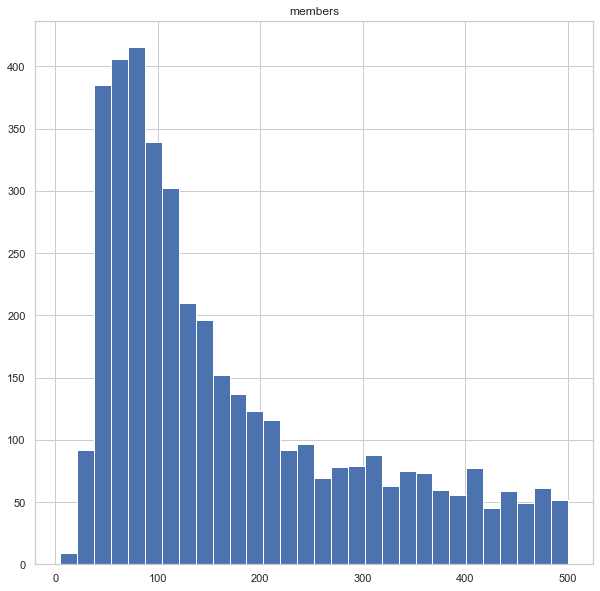

In [46]:
atr = 'members'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[5, 500], bins=num_bins, figsize=(10,10))

+ Tener entre 20 y 80 miembros es lo mas comun para la mayoria de animes

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

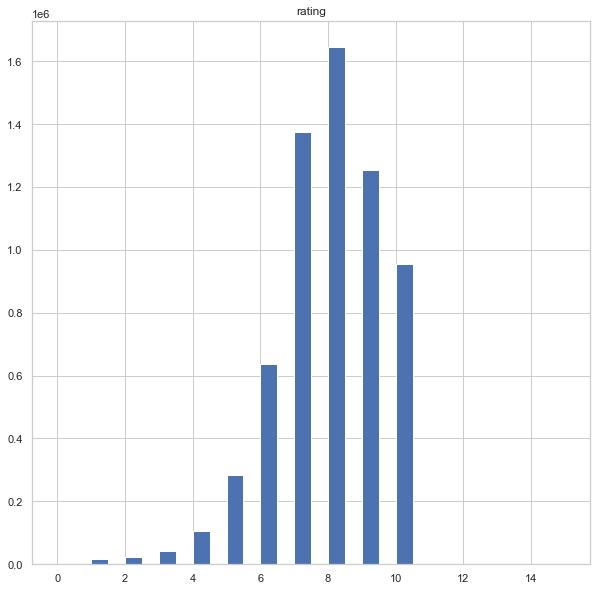

In [53]:
atr = 'rating'
num_bins = 30 #Número de columnas del histograma
dfRating.hist(column=atr,range=[0, 15], bins=num_bins, figsize=(10,10))

+ La mayoria de usuarios puntua 8 a los animes

## **Busqueda y eliminacion de outliers**

In [15]:
sns.set_theme(style="whitegrid")

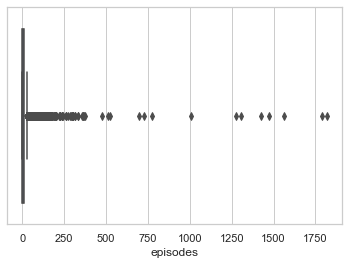

In [16]:
atr = 'episodes'
ax = sns.boxplot(x=dfAnime[atr])
#El boxplot se vuelve asi porque hay muchas peliculas y solo tienen un episodio

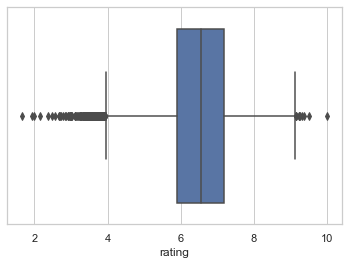

In [17]:
atr = 'rating'
ax = sns.boxplot(x=dfAnime[atr])

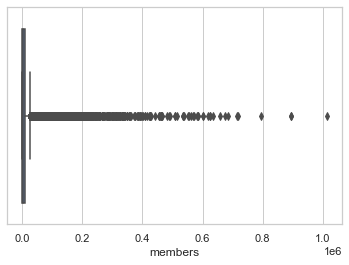

In [18]:
atr = 'members'
ax = sns.boxplot(x=dfAnime[atr])

# Fusion de los df

In [19]:
animeRatingDf = pd.merge(dfAnime,dfRating,on="anime_id",suffixes= [None, "_user"])
animeRatingDf = animeRatingDf.rename(columns={"rating_user": "user_rating"})
animeRatingDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337143 entries, 0 to 6337142
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         string 
 2   genre        string 
 3   type         string 
 4   episodes     int32  
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  int64  
dtypes: float64(1), int32(1), int64(4), string(3)
memory usage: 459.3 MB
